In [1]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append("../models/")
from Basin import Basin 
from functions import plot_style
import numpy as np
from datetime import datetime, timedelta
colors = plot_style("../fonts/Encode_Sans_Condensed/")

import warnings
warnings.filterwarnings("ignore")

# dates
start_date = datetime(2020, 12, 1)
end_date = datetime(2021, 10, 1)

# countries order
countries = ['Indonesia', 'Bolivia', 'Morocco', 'Bangladesh', 'Sri Lanka', 'Kenya', 'Mozambique',
             "Afghanistan", "Côte d'Ivoire", "Pakistan", "El Salvador", 
             "Philippines", "Uganda", "Kyrgyzstan", "Egypt", "Rwanda", "Zambia", "Angola", "Ghana", "Honduras"]

fully, partially = [], []
for country in countries:
    basin = Basin(country, "../basins/")
    vax = basin.vaccinations.loc[basin.vaccinations.Day <= end_date]
    partially.append(vax.people_vaccinated_per_hundred.values[-1])
    fully.append(vax.people_fully_vaccinated_per_hundred.values[-1])
    
fully, partially = np.array(fully), np.array(partially)
countries = np.array(countries)[np.argsort(-fully)]
countries

../models/functions.py:286: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


array(['Sri Lanka', 'El Salvador', 'Morocco', 'Bolivia', 'Honduras',
       'Philippines', 'Indonesia', 'Pakistan', 'Rwanda', 'Bangladesh',
       'Kyrgyzstan', 'Egypt', 'Mozambique', 'Afghanistan', 'Angola',
       'Ghana', 'Zambia', "Côte d'Ivoire", 'Kenya', 'Uganda'],
      dtype='<U13')

Sri Lanka 54.77
El Salvador 52.59666666666666
Morocco 51.235
Bolivia 28.65
Honduras 24.16
Philippines 19.363333333333333
Indonesia 18.73
Pakistan 13.1175
Rwanda 12.71
Bangladesh 10.14
Kyrgyzstan 9.44
Egypt 5.7
Mozambique 5.480833333333333
Afghanistan 4.459534883720931
Angola 3.22
Ghana 2.5129411764705885
Zambia 2.2
Côte d'Ivoire 1.8903846153846156
Kenya 1.66
Uganda 0.88


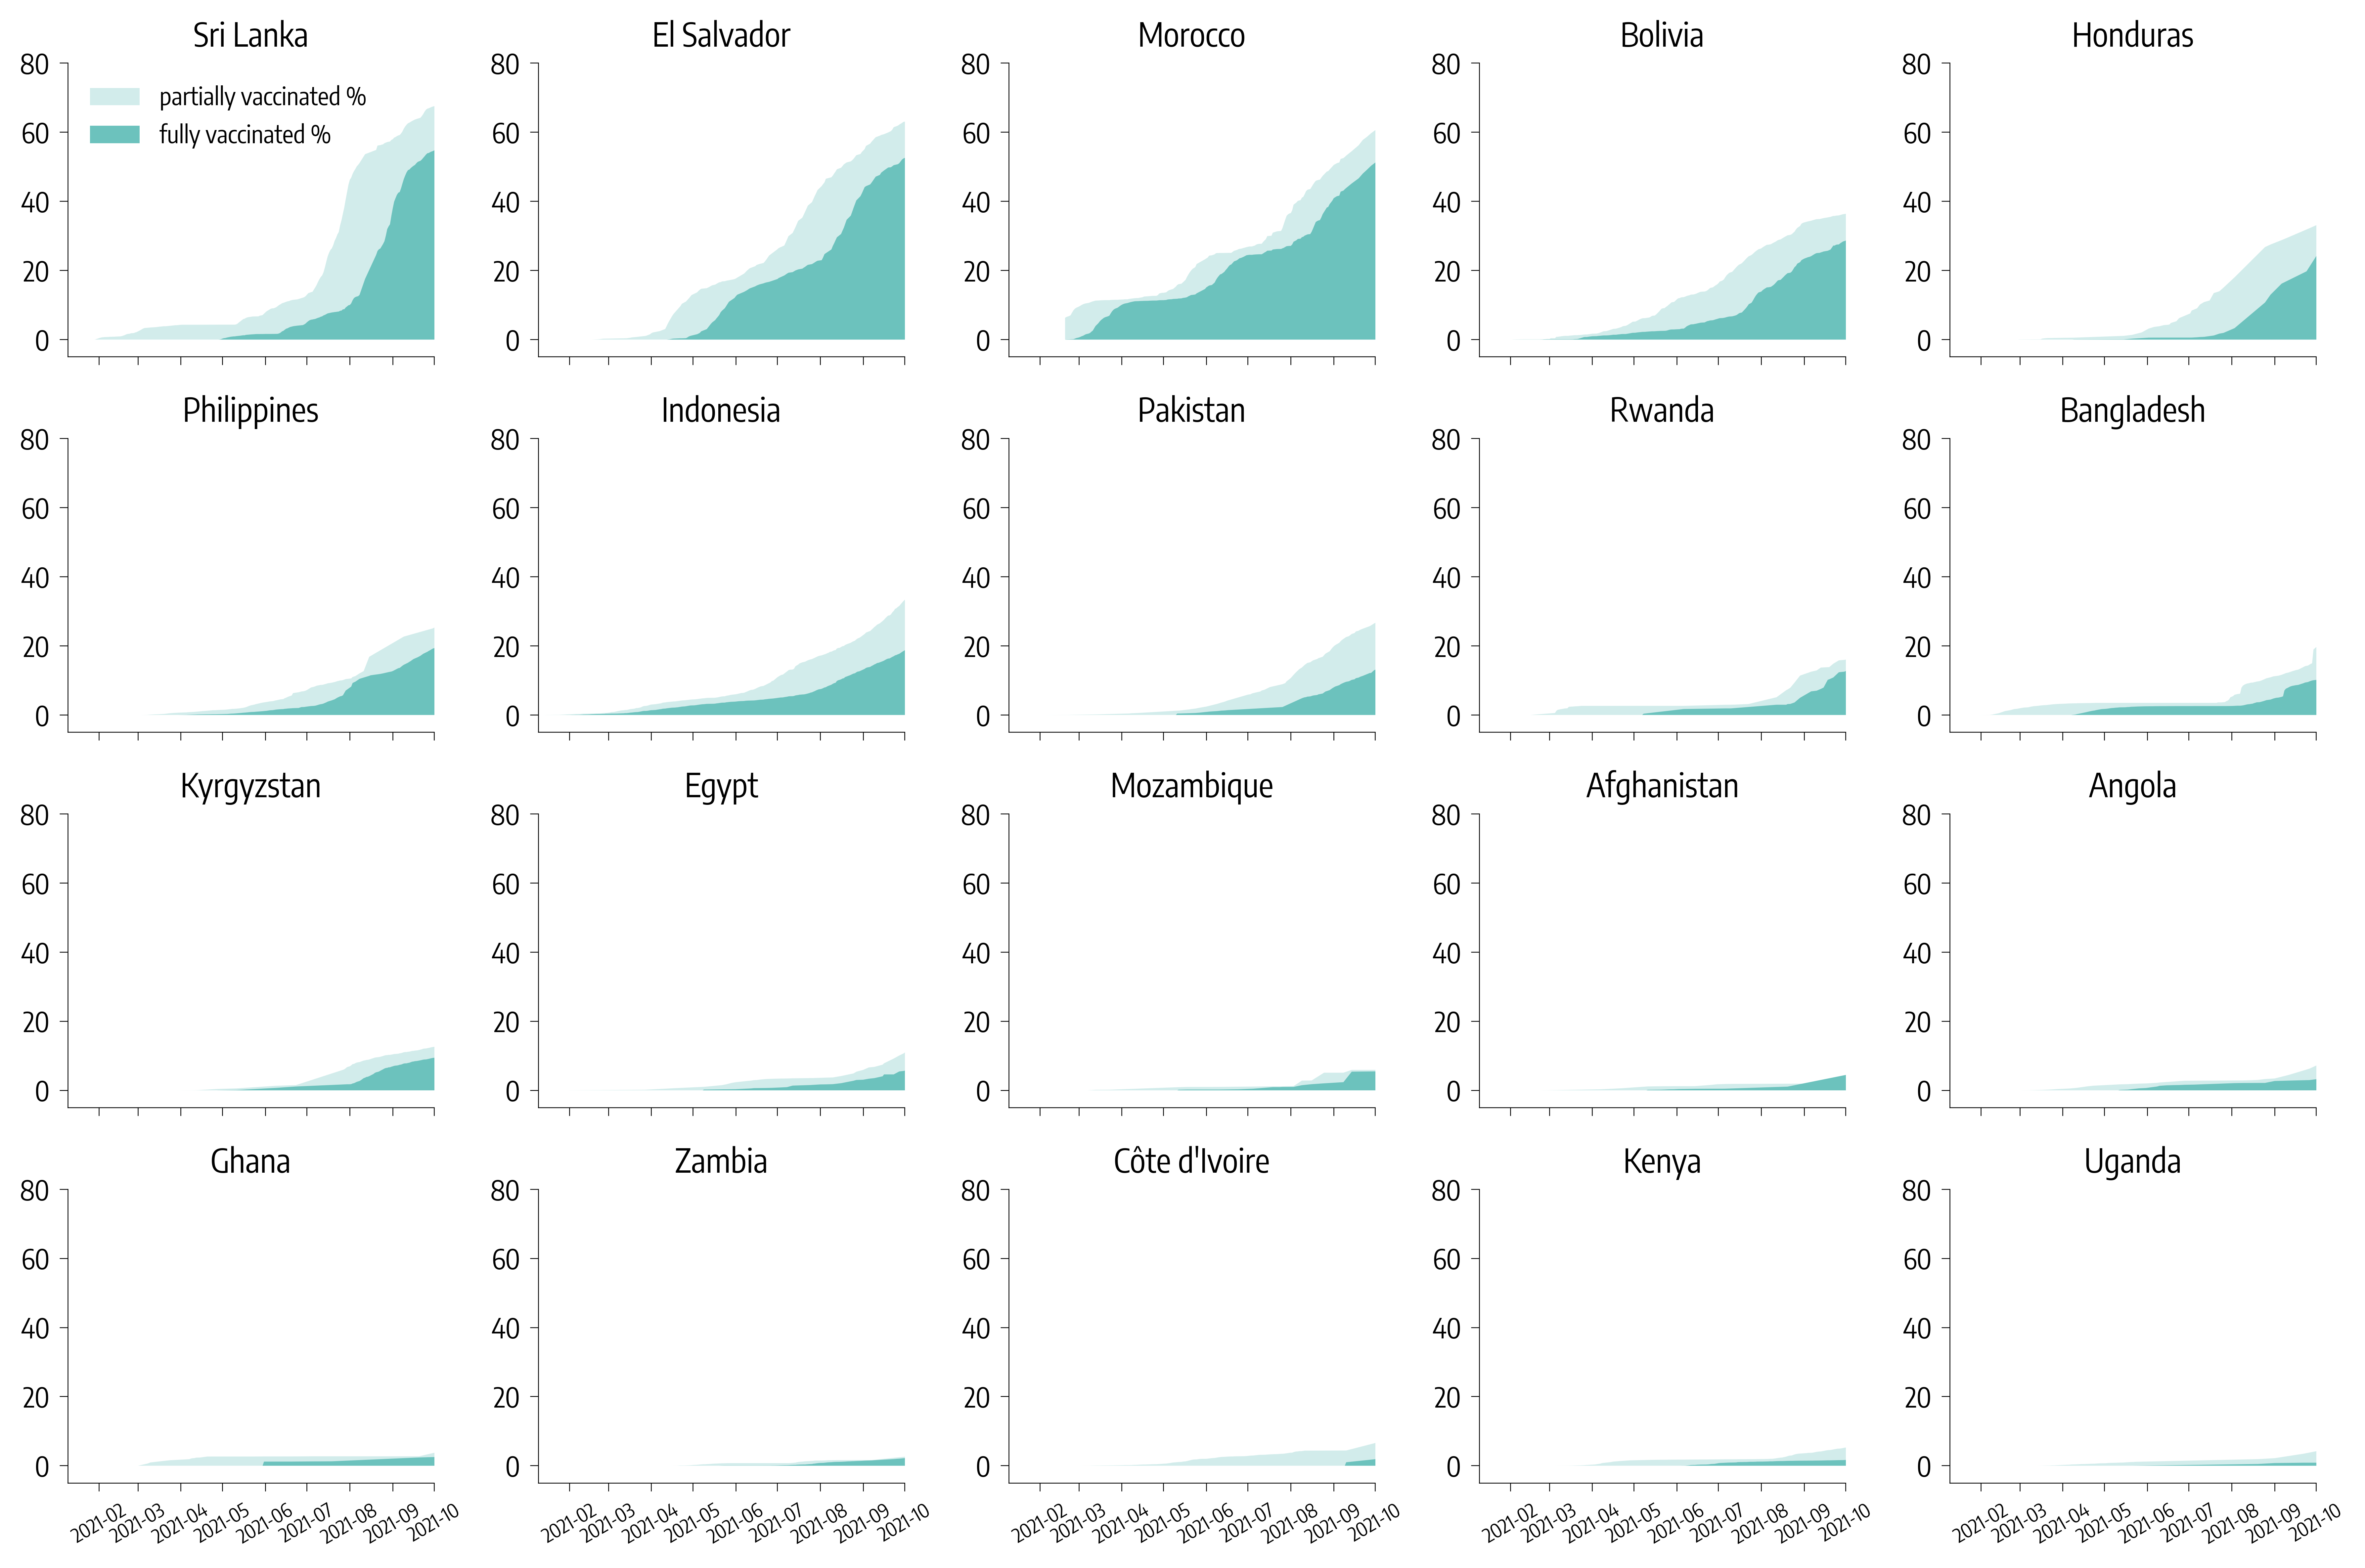

In [2]:
def plot_vax(basin_name, ax, title, legend=False, scenario=None):

    if scenario != None:
        file = "vaccinations_{0}.csv".format(scenario)
    else:
        file = "vaccinations.csv"
    vax = pd.read_csv("../basins/" + basin_name + "/vaccinations/" + file)
    vax.Day = pd.to_datetime(vax.Day)
    ax.fill_between(vax.Day, 0,
                    vax.people_vaccinated_per_hundred, color=colors[0], alpha=0.3, label="partially vaccinated %", linewidth=0)

    ax.fill_between(vax.Day, 0,
                    vax.people_fully_vaccinated_per_hundred, color=colors[0], label="fully vaccinated %", linewidth=0)
    
    print(country, vax.loc[vax.Day==end_date].people_fully_vaccinated_per_hundred.values[0])
    ax.set_title(title)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis='x', labelsize=7, rotation=30)
    ax.set_xlim(xmax=end_date)
    if legend:
        ax.legend(loc='upper left', frameon=False, fontsize=9)
    ax.set_ylim(-5, 80)
    #ax.set_ylabel("%")
   

fig, axes = plt.subplots(dpi=600, nrows=4, ncols=5, figsize=(12,8), sharex=True)

legend = True
for country, ax in zip(countries, axes.ravel()):
    plot_vax(country, ax, title=country, legend=legend)
    legend = False

plt.tight_layout()
#fig.suptitle("Vaccinations in LMIC", size=18, weight="bold", y=1.08)

plt.savefig("./img/vaccinations.pdf", bbox_inches='tight')

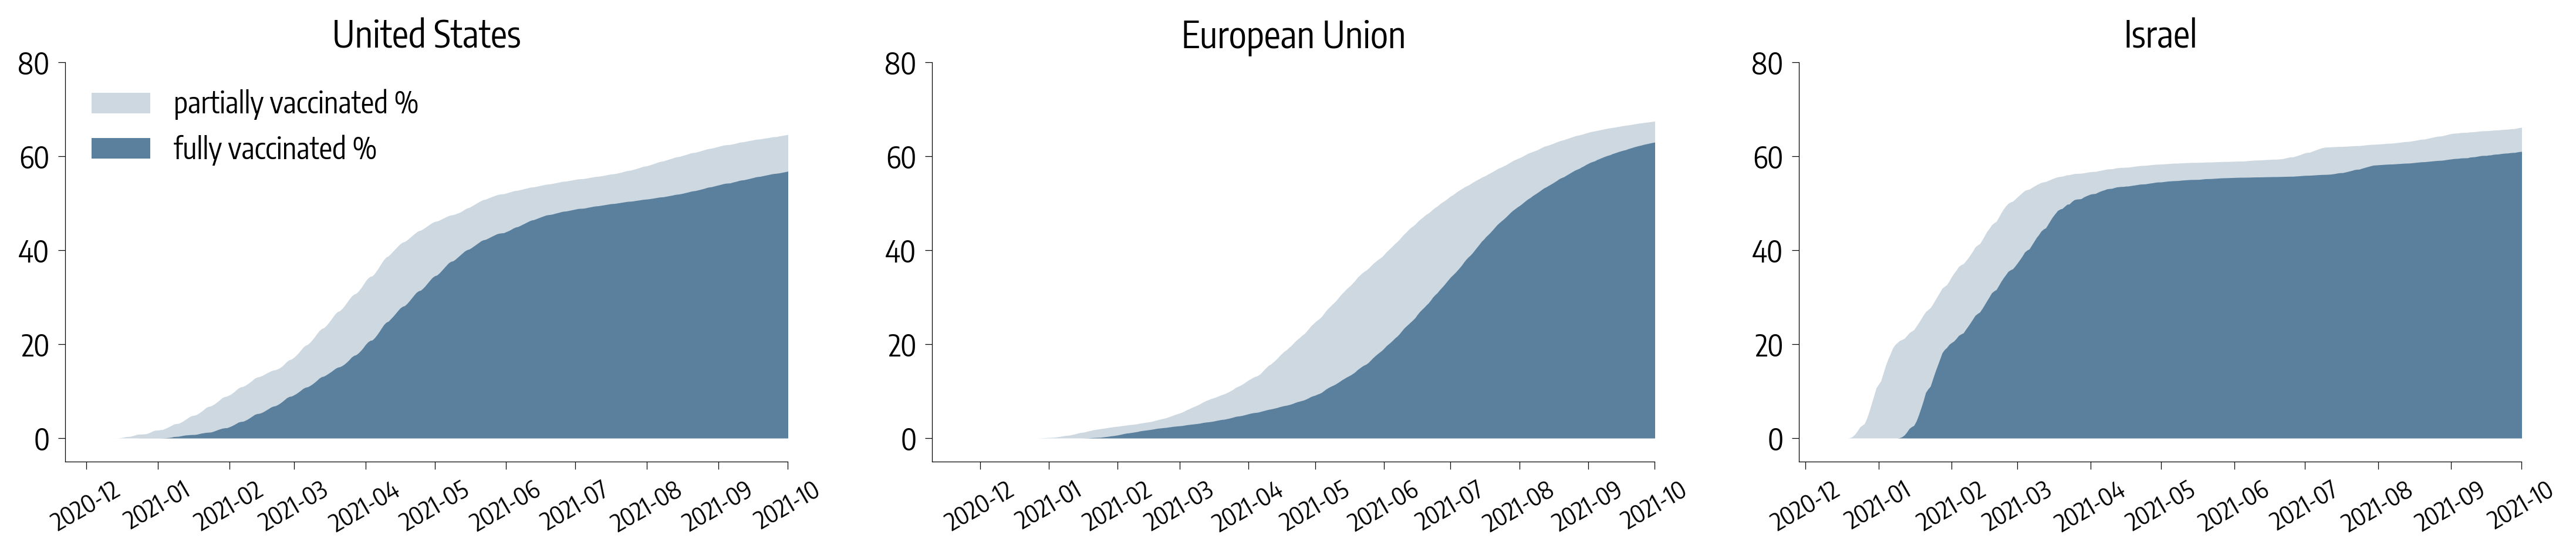

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(18,3), dpi=300)

def plot_vax(basin_name, ax, title, legend=False, scenario=None):

    if scenario != None:
        file = "vaccinations_{0}.csv".format(scenario)
    else:
        file = "vaccinations.csv"
    vax = pd.read_csv("../basins/" + basin_name + "/vaccinations/" + file)
    vax.Day = pd.to_datetime(vax.Day)
    ax.fill_between(vax.Day, 0,
                    vax.people_vaccinated_per_hundred, color=colors[1], alpha=0.3, label="partially vaccinated %", linewidth=0)

    ax.fill_between(vax.Day, 0,
                    vax.people_fully_vaccinated_per_hundred, color=colors[1], label="fully vaccinated %", linewidth=0)
    
    ax.set_title(title, fontsize=15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis='x', labelsize=10, rotation=30)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlim(xmax=end_date)
    if legend:
        ax.legend(loc='upper left', frameon=False, fontsize=12)
    ax.set_ylim(-5, 80)
    #ax.set_ylabel("%")

plot_vax("Angola", axes[0], "United States", legend=True, scenario="us_rescale")
plot_vax("Angola", axes[1], "European Union", legend=False, scenario="eu_rescale")
plot_vax("Angola", axes[2], "Israel", legend=False, scenario="isrl_rescale")

plt.savefig("./img/vaccinations_highincome.pdf", bbox_inches="tight")

In [4]:
for country in countries:
    basin = Basin(country, path_to_data="../basins/")
    print("{0}: {1}M".format(country, basin.Nk.sum() / 10**6))

Sri Lanka: 21.414M
El Salvador: 6.488M
Morocco: 36.911M
Bolivia: 11.673M
Honduras: 9.906M
Philippines: 109.581M
Indonesia: 273.523M
Pakistan: 220.893M
Rwanda: 12.952M
Bangladesh: 164.688M
Kyrgyzstan: 6.525M
Egypt: 102.334M
Mozambique: 31.258M
Afghanistan: 38.927M
Angola: 32.866M
Ghana: 31.07M
Zambia: 18.385M
Côte d'Ivoire: 26.378M
Kenya: 53.772M
Uganda: 45.741M


In [5]:
basin = Basin("Zambia", path_to_data="../basins/")
vax = basin.vaccinations_eu_rescale
print("Eu: ", vax.loc[vax.Day == end_date].people_fully_vaccinated_per_hundred.values[0])

vax = basin.vaccinations_us_rescale
print("US: ", vax.loc[vax.Day == end_date].people_fully_vaccinated_per_hundred.values[0])

vax = basin.vaccinations_isrl_rescale
print("Israel: ", vax.loc[vax.Day == end_date].people_fully_vaccinated_per_hundred.values[0])

Eu:  63.03
US:  56.84
Israel:  61.04


In [6]:
basin = Basin("Zambia", path_to_data="../basins/")
vax = basin.vaccinations_eu_rescale
print("Eu: ", vax.loc[vax.Day == datetime(2021, 3, 1)].people_fully_vaccinated_per_hundred.values[0])

vax = basin.vaccinations_us_rescale
print("US: ", vax.loc[vax.Day == datetime(2021, 3, 1)].people_fully_vaccinated_per_hundred.values[0])

vax = basin.vaccinations_isrl_rescale
print("Israel: ", vax.loc[vax.Day == datetime(2021, 3, 1)].people_fully_vaccinated_per_hundred.values[0])

Eu:  2.6
US:  9.17
Israel:  37.31
